# PCOS Diagnosis
***
## Table of Contents

***


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Introduction


## 2. Loading Data

The dataset used in this project (retrieved from [Kaggle - Polycystic ovary syndrome (PCOS)](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos))


In [70]:
df = pd.read_excel("_datasets/PCOS_data.xlsx", sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [71]:
df.shape

(541, 45)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [73]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## 3. Data Preprocessing
- Drop unnecessary features.
- Correct feature names.
- Deal with missing values.
- Modify wrong data types.

### Correcting Feature Names

In [74]:
df["Marriage Status (Yrs)"] = df["Marraige Status (Yrs)"]

### Dropping Unnecessary Features

In [75]:
df = df.drop(
    columns=["Unnamed: 44", "Sl. No", "Patient File No.", "Marraige Status (Yrs)"]
)

### Dealing with Missing Values

In [76]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Fast food (Y/N)          1
Marriage Status (Yrs)    1
dtype: int64

According to the null check, the columns `Marriage Status (Yrs)` and `Fast food (Y/N)` each contain one missing value. The missing value in `Marriage Status (Yrs)` will be replaced with the median of the feature, while the one in `Fast food (Y/N)` will be replaced with the most frequent value (mode).

In [77]:
df["Marriage Status (Yrs)"] = df["Marriage Status (Yrs)"].fillna(
    df["Marriage Status (Yrs)"].median()
)
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].mode()[0])

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

### Modifying Wrong Data Types
The columns `II    beta-HCG(mIU/mL)` and `AMH(ng/mL)` include three different datatypes. Therefore, they will be converted to float.

In [78]:
n_datatypes_II = df["II    beta-HCG(mIU/mL)"].apply(type).nunique()
n_datatypes_AMH = df["AMH(ng/mL)"].apply(type).nunique()

types_in_col_II = set(type(x) for x in df["II    beta-HCG(mIU/mL)"])
types_in_col_AMH = set(type(x) for x in df["AMH(ng/mL)"])

print(
    f"'II    beta-HCG(mIU/mL)' contains {n_datatypes_II} datatypes: {types_in_col_II}"
)
print(f"'AMH(ng/mL)' contains {n_datatypes_AMH} datatypes: {types_in_col_AMH}")

'II    beta-HCG(mIU/mL)' contains 3 datatypes: {<class 'int'>, <class 'str'>, <class 'float'>}
'AMH(ng/mL)' contains 3 datatypes: {<class 'int'>, <class 'str'>, <class 'float'>}


A couple of typographical errors have been identified, which must be addressed manually prior to converting data types:
- '1.99.' -> '1.99' (`II    beta-HCG(mIU/mL)`)
- 'a' -> median() (`AMH(ng/mL)`)

In [79]:
df.loc[123, "II    beta-HCG(mIU/mL)"] = df.loc[123, "II    beta-HCG(mIU/mL)"][:-1]
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"])

In [80]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].median())

In [81]:
n_datatypes_II = df["II    beta-HCG(mIU/mL)"].apply(type).nunique()
n_datatypes_AMH = df["AMH(ng/mL)"].apply(type).nunique()

types_in_col_II = set(type(x) for x in df["II    beta-HCG(mIU/mL)"])
types_in_col_AMH = set(type(x) for x in df["AMH(ng/mL)"])

print(
    f"'II    beta-HCG(mIU/mL)' contains {n_datatypes_II} datatypes: {types_in_col_II}"
)
print(f"'AMH(ng/mL)' contains {n_datatypes_AMH} datatypes: {types_in_col_AMH}")

'II    beta-HCG(mIU/mL)' contains 1 datatypes: {<class 'float'>}
'AMH(ng/mL)' contains 1 datatypes: {<class 'float'>}


## 4. Exploratory Data Analysis

In [82]:
def plot_correlation_matrix(df: pd.DataFrame, method: str = "pearson") -> pd.DataFrame:
    num_columns = df.select_dtypes(include="number")
    plt.figure(figsize=(12, 8))
    corr = num_columns.corr(method=method)
    sns.heatmap(corr, square=True)
    plt.title(f"{method.title()} Correlation Matrix")
    plt.xticks(rotation=45, ha="right")
    plt.yticks()
    plt.tight_layout()
    plt.show()
    return corr

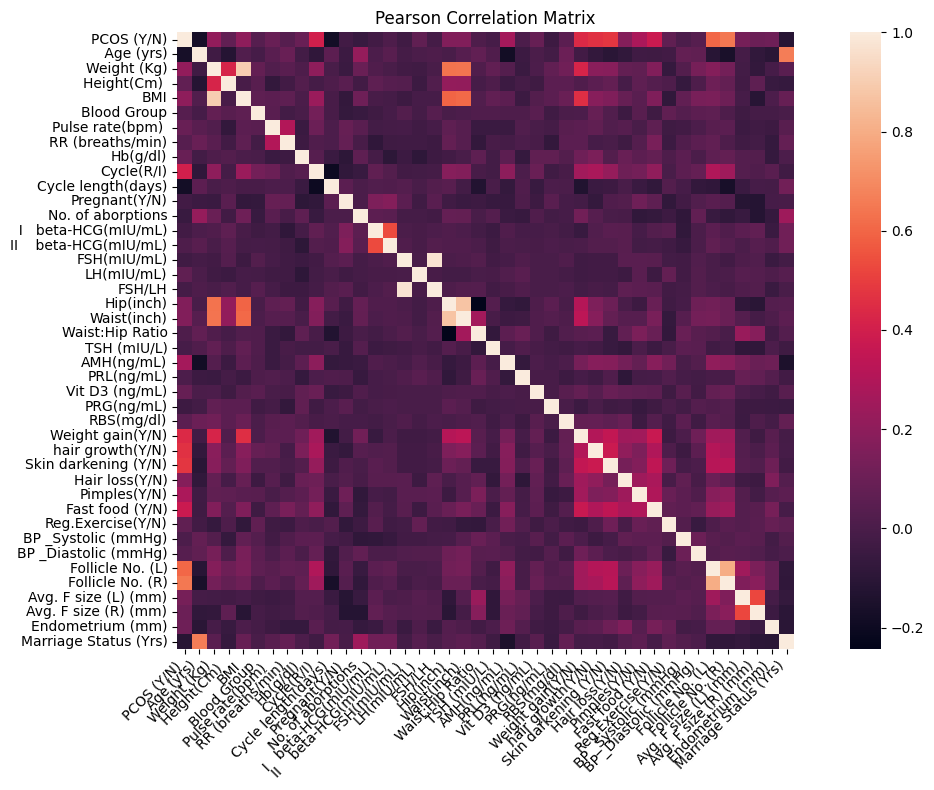

In [83]:
corr_matrix = plot_correlation_matrix(df)

Here are the top ten features correlated with the diagnosis of PCOS in descending order.

In [84]:
corr_matrix["PCOS (Y/N)"].sort_values(ascending=False)[:10]

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Name: PCOS (Y/N), dtype: float64

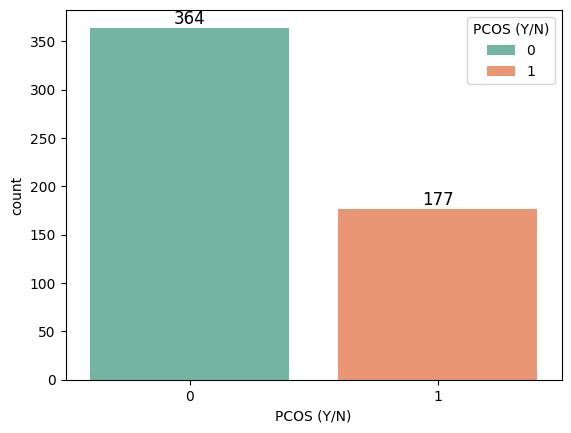

In [85]:
ax = sns.countplot(df, x="PCOS (Y/N)", hue="PCOS (Y/N)", palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.show()

The imbalance of the target value may result in poor predictive performance, especially for minority class. To address this issue, we can either **oversample the minority class** or **undersamble the majority class** during training process. 

## 5. Predictive Modelling
For this dataset, six classifiers will be compared for evaluation:
- Logistic Regression
- K-Nearest Neighbour Classifier
- Support Vector Machine
- Decision Tree Classifier
- Random Forest Classifier
- XGBoost Classifier

In [86]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Standardisation
Some machine learning models, such as KNN and SVM, compute distances or rely on dot products. Thus, they require scaled features to avoid biased results. Standardisation is generally preferred for most algorithms when features are normally distributed or when using regularised models. Normalisation would be useful if the data are not Gaussian or when we want all features strictly in the same range (e.g., for neural networks)

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tuning
Optimisation of hyperparameters is essential to obtain the best performance from machine learning models. **Grid Search** or **Random Search** is typically used to find the best hyperparameters with cross-validation.

We use the stratified K-Fold cross-validator `StratifiedKFold()`. With this approach, each fold maintains approximately the same percentage of samples for each class as found in the original dataset. This technique is especially suitable for classification problems with imbalanced classes, preventing bias caused by random splitting and ensuring fair evaluation of all classes.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg_param_grid = {
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["lbfgs", "liblinear"],
    "penalty": ["l2"],
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_log_reg = GridSearchCV(
    estimator=log_reg, param_grid=log_reg_param_grid, scoring="f1", cv=skf, n_jobs=-1
)
grid_log_reg.fit(X_train_scaled, y_train)
print(f"Best parameters for Logistic Regression: {grid_log_reg.best_params_}")
print(f"Best mean cross-validated score: {grid_log_reg.best_score_:.4f}")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validated score: 0.8096


Instead of manually repeating the hyperparameter tuning process for each model under evaluation, we can employ a `Pipeline` to automate the entire workflow. A pipeline establishes a structured sequence for data preprocessing, model building, and evaluation. This approach enables us to modularise the machine learning process, making it significantly more efficient and scalable. Firstly, let's define classifiers and parameter grids for all the models.

In [90]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

param_grids = {
    "Logistic Regression": {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__penalty": ["l2"],
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7, 9],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan"],
    },
    "SVM": {
        "clf__C": [0.1, 1, 10, 100],
        "clf__kernel": ["rbf", "linear"],
        "clf__gamma": ["scale", "auto"],
    },
    "Decision Tree": {
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__max_features": [None, "sqrt", "log2"],
    },
    "XGBoost": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.01, 0.1, 0.2],
        "clf__subsample": [0.6, 0.8, 1.0],
        "clf__colsample_bytree": [0.6, 0.8, 1.0],
    },
}


As mentioned in [4. Exploratory Data Analysis](#4-exploratory-data-analysis), the target variable shows class imbalance, which may result in misleading performance metrics. To address this, we employ the **Synthetic Minority Oversampling Technique** (SMOTE), which generates synthetic samples for the minority class by interpolating between existing minority instances. This approach reduces overfitting compared to simple duplication.

SMOTE is an oversampler from the imbalanced-learn library, and while it does implement the necessary methods, it is not compatible with `sklearn.pipeline.Pipeline`. Instead, `imblearn.pipeline.Pipeline` must be used to work with samplers in `imblearn`.

In [ ]:
from imblearn.pipeline import Pipeline

best_estimators = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    pipeline = Pipeline(
        [("smote", SMOTE(random_state=42)), ("clf", clf)]
    )  # SMOTE + classifier
    param_grid = param_grids[name]
    grid = GridSearchCV(
        estimator=pipeline, param_grid=param_grid, scoring="f1", cv=skf, n_jobs=-1
    )
    grid.fit(X_train_scaled, y_train)
    print(f"Best hyperparameters for {name}: {grid.best_params_}")
    print(f"Best mean cross-validated F1-score: {grid.best_score_:.4f}")
    best_estimators[name] = grid.best_estimator_


===== Logistic Regression =====
Best hyperparameters for Logistic Regression: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best mean cross-validated F1-score: 0.8219

===== KNN =====
Best hyperparameters for KNN: {'clf__metric': 'manhattan', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Best mean cross-validated F1-score: 0.8151

===== SVM =====
Best hyperparameters for SVM: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best mean cross-validated F1-score: 0.8425

===== Decision Tree =====
Best hyperparameters for Decision Tree: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best mean cross-validated F1-score: 0.7252

===== Random Forest =====
Best hyperparameters for Random Forest: {'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best mean cross-validated F1-score: 0.8499

===== XGBoost =====
Best hyperparameters for XGBoost: {'clf__colsample_bytree': 0.8, 'c

### Evaluation on Test Data

In [92]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)


def evaluate_model_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return {
        "Accuracy": acc,
        "Precision": pre,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
    }

In [93]:
best_model_log_reg = best_estimators["Logistic Regression"]
best_model_knn = best_estimators["KNN"]
best_model_svm = best_estimators["SVM"]
best_model_dt = best_estimators["Decision Tree"]
best_model_rf = best_estimators["Random Forest"]
best_model_xgb = best_estimators["XGBoost"]

In [94]:
results_log_reg = evaluate_model_classification(
    best_model_log_reg, X_test_scaled, y_test
)
results_knn = evaluate_model_classification(best_model_knn, X_test_scaled, y_test)
results_svm = evaluate_model_classification(best_model_svm, X_test_scaled, y_test)
results_dt = evaluate_model_classification(best_model_dt, X_test_scaled, y_test)
results_rf = evaluate_model_classification(best_model_rf, X_test_scaled, y_test)
results_xgb = evaluate_model_classification(best_model_xgb, X_test_scaled, y_test)

In [96]:
results_df = pd.DataFrame(
    [results_log_reg, results_knn, results_svm, results_dt, results_rf, results_xgb],
    index=[
        "Logistic Regression",
        "KNN",
        "SVM",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
    ],
)
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.908257   0.842105  0.888889  0.864865  0.903349
KNN                  0.871560   0.789474  0.833333  0.810811  0.861872
SVM                  0.917431   0.864865  0.888889  0.876712  0.910198
Decision Tree        0.889908   0.875000  0.777778  0.823529  0.861492
Random Forest        0.899083   0.878788  0.805556  0.840580  0.875381
XGBoost              0.917431   0.864865  0.888889  0.876712  0.910198
